The Loan Default Prediction project aims to leverage data science techniques to assess the likelihood of borrowers defaulting on loans. This project involves building predictive models that use historical loan data to identify patterns and factors that contribute to defaults. The goal is to create a tool that can help financial institutions make informed decisions about lending by accurately predicting the risk of default for new loan applicants.


1- Preprocessing:


-  Clean and preprocess the data by handling missing values, removing outliers, and encoding categorical variables.

2- Exploratory Data Analysis (EDA):

- Perform EDA to uncover insights, relationships, and trends in the data.

- Visualize key features that might influence loan defaults, such as income levels, loan amount, interest rates, and repayment terms.

3- Feature Engineering:

- Creating new features or transform existing ones to improve the model's predictive power.

- Examples include debt-to-income ratios, loan-to-value ratios, and payment histories.

4- Model Building and Evaluation:

- Develop various machine learning models, such as logistic regression, decision trees, random forests, gradient boosting, and neural networks.

- Evaluate models using metrics like accuracy, precision, recall, F1-score, and AUC-ROC curve.

5- Model Deployment:

- Integrate the best-performing model into a user-friendly interface for financial analysts and decision-makers.
Provide clear interpretations of the model’s predictions and the factors driving them.

In [1]:
 # Import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#from imblearn.over_sampling import ADASYN
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
%matplotlib inline
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib
import colorsys
import missingno as msno
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path  
import itertools
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200) # So we can see all columns
pd.set_option('display.max_rows',200)
# setting up plot style
#style.use('seaborn-poster')
#style.use('fivethirtyeight')

pd.set_option("display.max_columns", None)

In [2]:
app = pd.read_csv("/kaggle/input/loan-defaulter/application_data.csv", na_values=['XNA', 'Unknown', 'UNKNOWN','Unknown'])

In [3]:
# Database dimension
app.shape

(307511, 122)

In [4]:
# Database column types
app.info(max_cols=122)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307507 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [5]:
# Checking the numeric variables of the dataframes
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [6]:
# Check categorical vs. numerical variables
categorical_vars = [var for var in app.columns if app[var].dtype == 'object']
numerical_vars = [var for var in app.columns if app[var].dtype in ['int64', 'float64']]
print('Dataset contains', len(categorical_vars), 'Categorical Variables and', len(numerical_vars), 'Numerical Variables')

Dataset contains 16 Categorical Variables and 106 Numerical Variables


In [7]:
# Functions
def missing(df):
    msng_info = pd.DataFrame(df.isnull().sum().sort_values()).reset_index()
    msng_info.rename(columns={'index':'col_name',0:'null_count'},inplace=True)
    msng_info['msng_pct'] = msng_info['null_count']/df.shape[0]*100
    return msng_info

def plot_missing_location(df):
    plt.figure(figsize=(10,7))
    plt.title('Missing Location')
    sns.heatmap(df.isnull(), cmap= 'Blues')
    plt.show()

# Create a function for analysin new missing values to avoid repitition as we'll do this 18 times :)
def analyze_missing_numerical(column):
    # Convert column to numeric type
    app[column] = pd.to_numeric(app[column], errors='coerce')

    print(f"Missing values in {column}:")
    print(app[column].isnull().sum())
    print(f"Percentage of missing values in {column}:")
    print(app[column].isnull().mean())
    print(f"Descriptive statistics for {column}:")
    print(app[column].describe())

    # calculate mean,median to choose suitable imputation for every round
    print(f"Mean Value for {column}:")
    print(app[column].describe().mean())
    print(f"Median Value for {column}:")
    print(app[column].describe().median())

def analyze_missing_categorical(column):
    # Count the number/mean of missing values
    missing_count = app[column].isnull().sum()
    missing_proportion = app[column].isnull().mean()

    print(f"Missing Count for {column}: {missing_count}")
    print(f"Missing Proportion for {column}: {missing_proportion}")

    # Count the frequency
    value_counts = app[column].value_counts(dropna=False)
    print(f"Value Counts for {column}:")
    print(value_counts)


def extract_col_starts_with(data, the_string):
  columns = []
  for col in data.columns:
      if col.startswith(the_string):
          columns.append(col)
  return columns


def Multi_hist_ploting(data, columns):

  n_cols = 4  # Number of columns in the grid
  n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate the required number of rows

  plt.figure(figsize=(10, 3 * n_rows))

  # Plotting each column in a separate subplot
  for i, column in enumerate(columns):
      plt.subplot(n_rows, n_cols, i + 1)
      plt.hist(data[column], bins=30, color='skyblue', edgecolor='black')
      plt.title(f'{column}', fontsize=8)
      plt.xlabel('Value', fontsize=10)
      plt.ylabel('Frequency', fontsize=10)
      plt.grid(False)
      plt.gca().spines['top'].set_visible(False)
      plt.gca().spines['right'].set_visible(False)

  plt.tight_layout()
  plt.show()


def map_organization_type(organization):
    if isinstance(organization, str):  # Check if the value is a string
        if ":" in organization and not "transport" in organization.lower():
            return "Industry_Trade"
        elif organization in ['Business Entity Type 1', 'Business Entity Type 2', 'Business Entity Type 3', 'Bank', 'Insurance']:
            return "Business_Finance"
        elif organization in ['Security', 'Security Ministries', 'Police', 'Military', 'Emergency', 'Government', 'Legal Services']:
            return "Civil_Legal_Services"
        elif organization in ['Kindergarten', 'School', 'University', 'Medicine']:
            return "Education_Healthcare"
        elif organization in ['Cleaning', 'Construction', 'Agriculture', 'Electricity', 'Services']:
            return "Goods_Producing_And_Services"
        elif organization in ['Transport: type 1', 'Transport: type 2', 'Transport: type 3', 'Transport: type 4', 'Hotel', 'Housing', 'Realtor', 'Restaurant', 'Culture']:
            return "Travel_Hospitality_Real_Estate"
        elif organization in ['Mobile', 'Postal', 'Telecom', 'Advertising']:
            return "Communication"
        elif organization in ['Other', 'XNA', 'Religion']:
            return "Miscellaneous"
        else:
            return organization
    else:
        return "Unknown"  # Or any other default value for non-string entries



## Working with Missing Values
### Visualize Miss Values

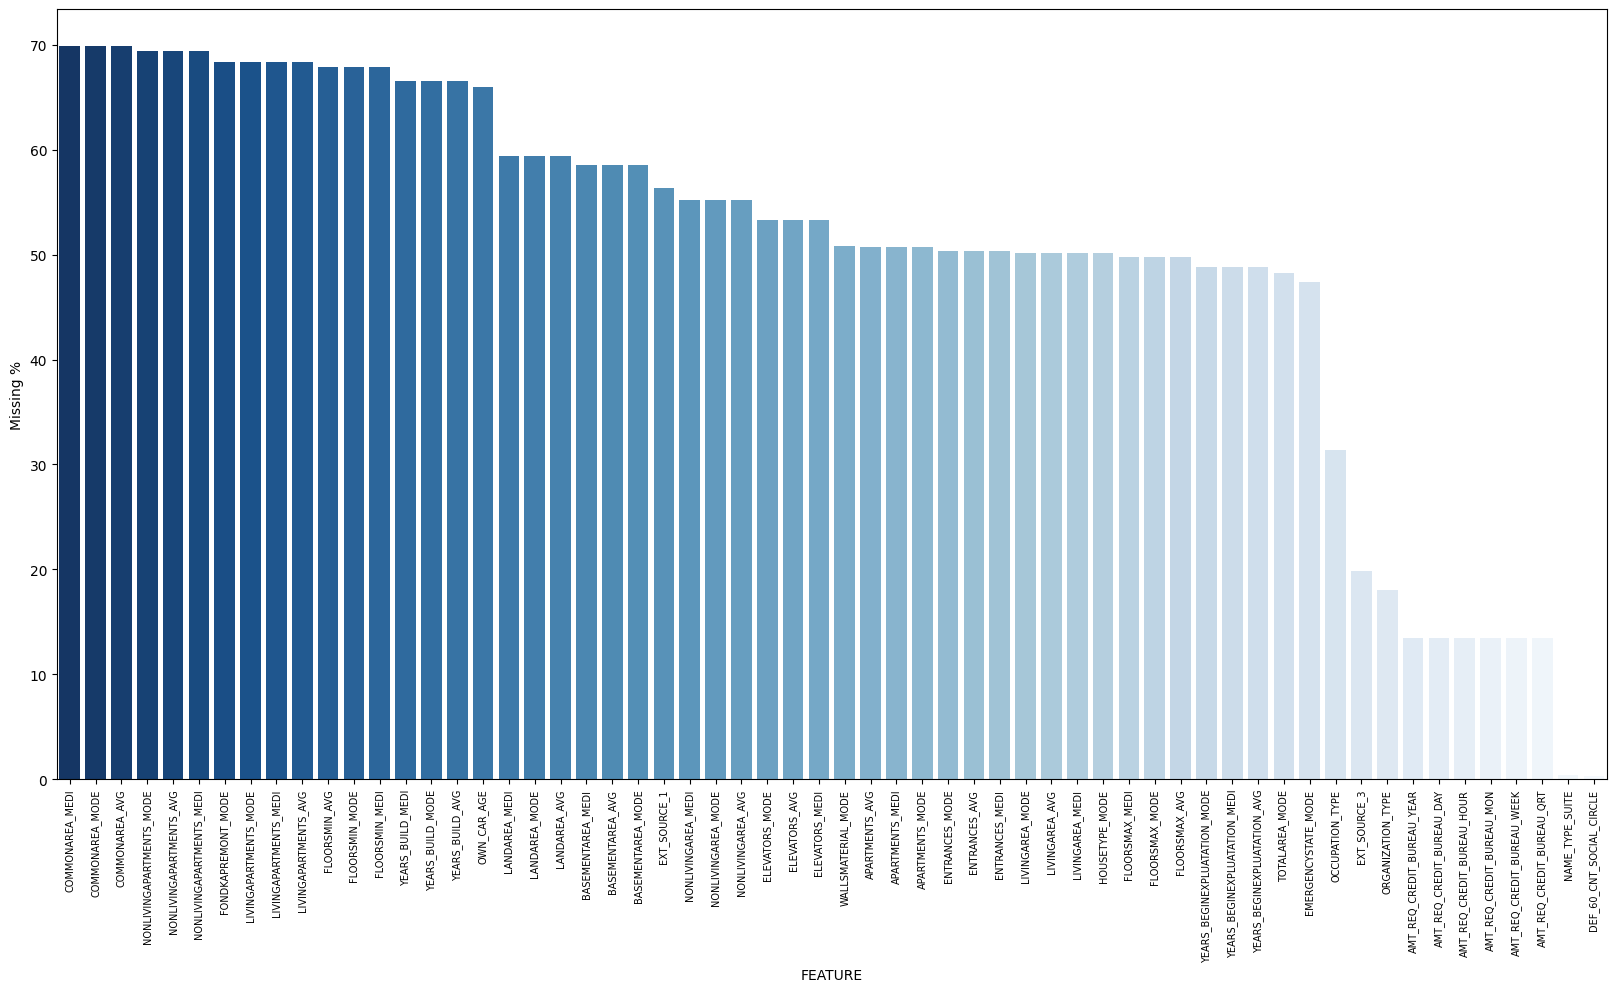

In [8]:
missing_data = app.isna().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data>0]
missing_percentage = (100*missing_data/app.shape[0])
## Visualising missing data in the dataset

plt.figure(figsize=(20,10))
sns.barplot(x = missing_percentage.index[:60], y = missing_percentage.values[:60],palette='Blues_r')
plt.xticks(rotation =90,fontsize =7)
plt.xlabel("FEATURE",fontsize = 10)
plt.ylabel("Missing %",fontsize = 10)
plt.show()

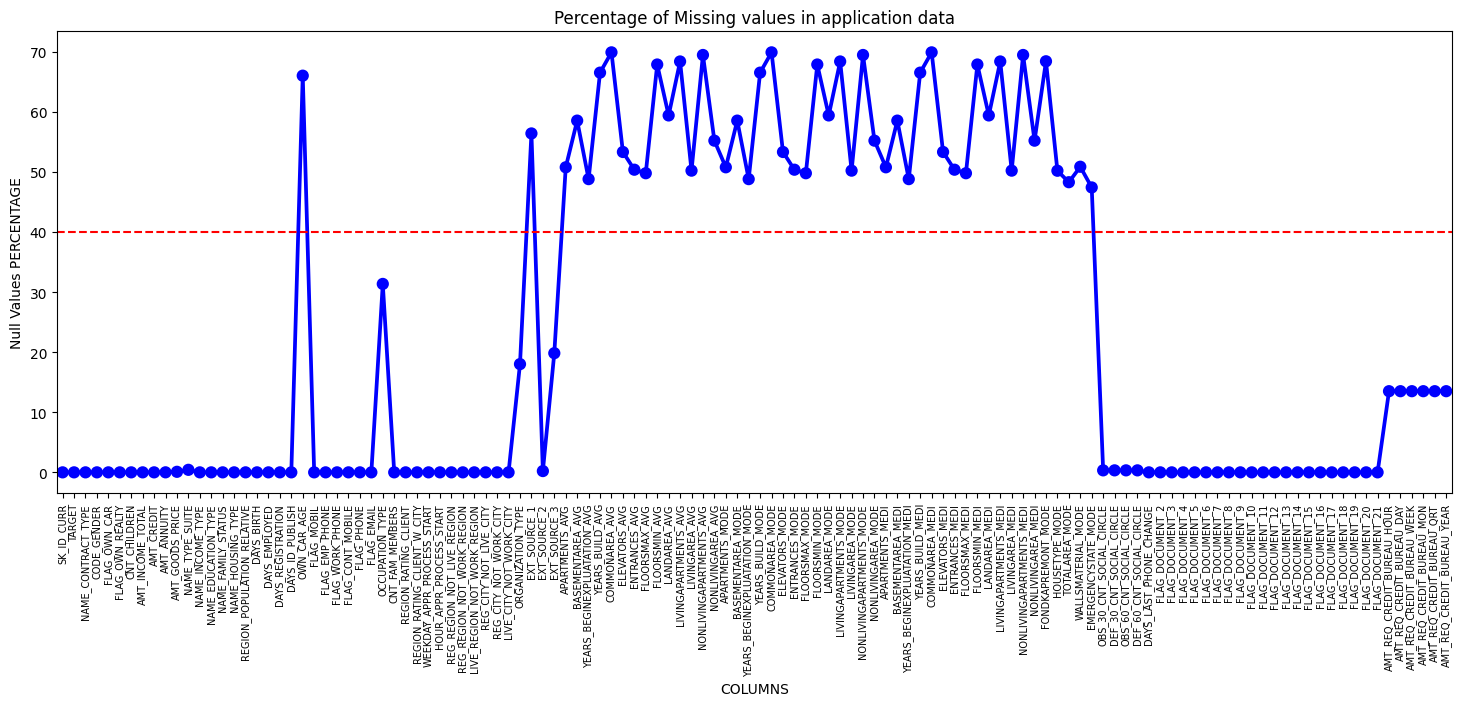

In [9]:
null_app = pd.DataFrame((app.isnull().sum())*100/app.shape[0]).reset_index()
null_app.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_app,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [10]:
missing_info = missing(app)
missing_info[missing_info['msng_pct']>40].shape[0]

49

49 of the columns contains greater then 40 percent of missing, we don't accept that so we will drop it, but may there is a relation between the missing in column and another column or a meaning for the missing

let's check that before removing the columns that > 40 precent missing

In [11]:
missing_after_remove_cols = missing(app)
missing_after_remove_cols[(missing_after_remove_cols['null_count'] > 1 )].sort_values(by= 'msng_pct', ascending=False).head(20)

,col_name,null_count,msng_pct
121,COMMONAREA_AVG,214865,69.872297
120,COMMONAREA_MEDI,214865,69.872297
119,COMMONAREA_MODE,214865,69.872297
117,NONLIVINGAPARTMENTS_MODE,213514,69.432963
116,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
118,NONLIVINGAPARTMENTS_AVG,213514,69.432963
115,FONDKAPREMONT_MODE,210295,68.386172
113,LIVINGAPARTMENTS_AVG,210199,68.354953
112,LIVINGAPARTMENTS_MEDI,210199,68.354953
114,LIVINGAPARTMENTS_MODE,210199,68.354953


- there is a relationship between missing at Own_car_age and the person Acually has a car or not

-  if the person has no can , so no Car age!, so the missing is means that the value is equals 0

In [12]:
app.loc[app['OWN_CAR_AGE'].isna()==True,['FLAG_OWN_CAR','OWN_CAR_AGE']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 202929 entries, 0 to 307510
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   FLAG_OWN_CAR  202929 non-null  object 
 1   OWN_CAR_AGE   0 non-null       float64
dtypes: float64(1), object(1)
memory usage: 4.6+ MB


In [13]:
# the index that has car and car_age is missed
## NaN values for own_car_age could possibely be marked nan for thsoe who do not own a car
## the meaning of the null values not missing but equals 0

own_car_missing_index = app.loc[(app.FLAG_OWN_CAR=='Y') & (app.OWN_CAR_AGE.isna()==True)].index
own_car_missing_index.shape

(5,)

there was only 5 rows that is actually null, and we have 202929 recorded as a null values , so the values is should be 0, so we can not drop OWN_CAR_AGE

In [14]:
# we replace the null values with 0
app['OWN_CAR_AGE'].fillna(0,inplace = True)

In [15]:
missing_after_remove_cols = missing(app)
missing_after_remove_cols[(missing_after_remove_cols['null_count'] > 1 )].sort_values(by= 'msng_pct', ascending=False)

,col_name,null_count,msng_pct
121,COMMONAREA_AVG,214865,69.872297
120,COMMONAREA_MODE,214865,69.872297
119,COMMONAREA_MEDI,214865,69.872297
117,NONLIVINGAPARTMENTS_MODE,213514,69.432963
118,NONLIVINGAPARTMENTS_AVG,213514,69.432963
...,...,...,...
58,AMT_GOODS_PRICE,278,0.090403
57,AMT_ANNUITY,12,0.003902
56,CODE_GENDER,4,0.001301
55,NAME_FAMILY_STATUS,2,0.000650


we see that no another relations in the missing between columns , so we will drop the missing columns > 40%

In [16]:
high_miss_values = app.columns[app.isna().sum()/len(app)*100 > 40]
app.drop(columns=high_miss_values[1:], inplace=True)

let's analyze the missing and check if there is a relation between the missing values between columns(missing Location)

we will check it using corr matrix of the missing

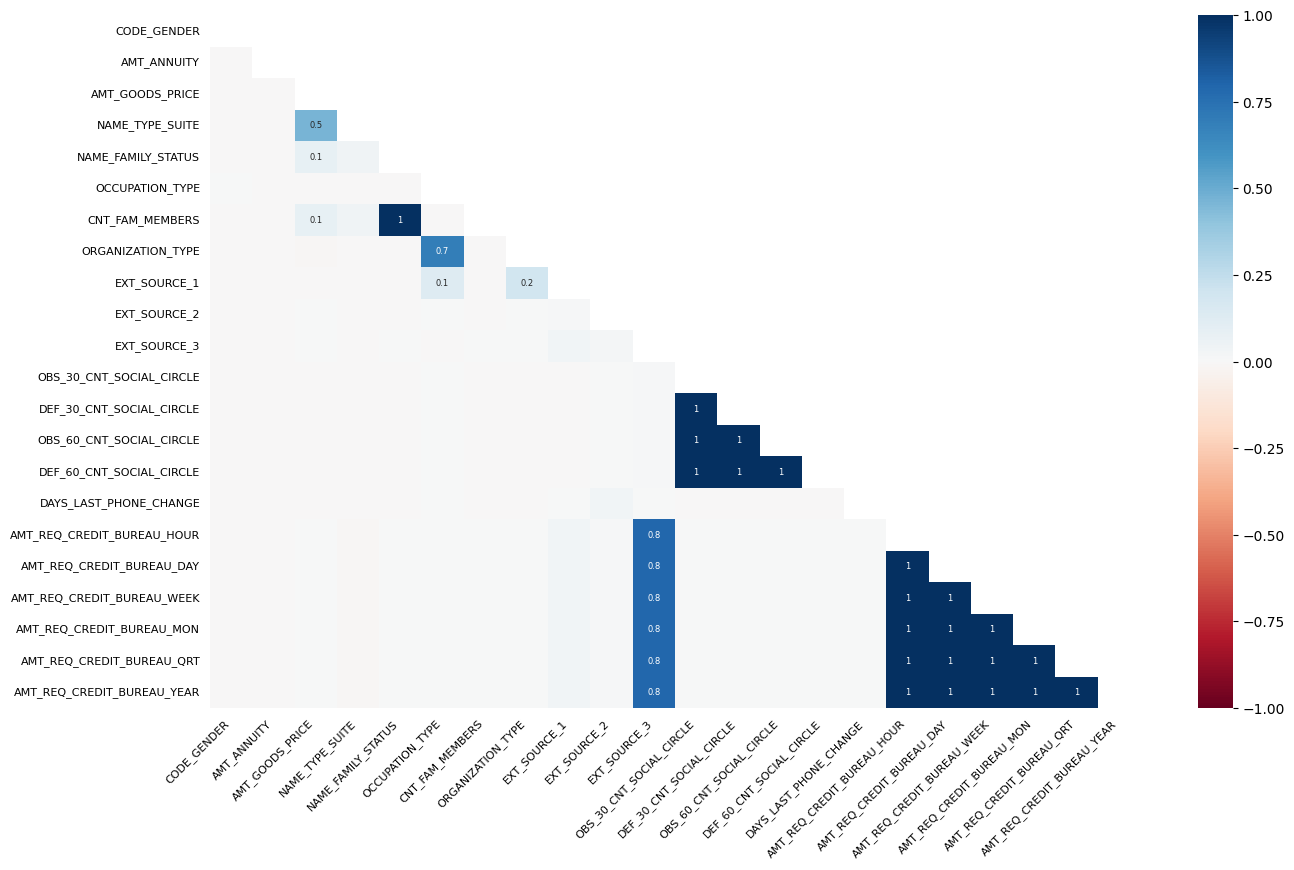

In [17]:
msno.heatmap(app, figsize=(15,9), fontsize=8);

In [18]:
data = app.copy()

AMT columns Missing are correlated, let's try to make it more clear

In [19]:
Amt = extract_col_starts_with(data=app, the_string='AMT_')
Amt

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

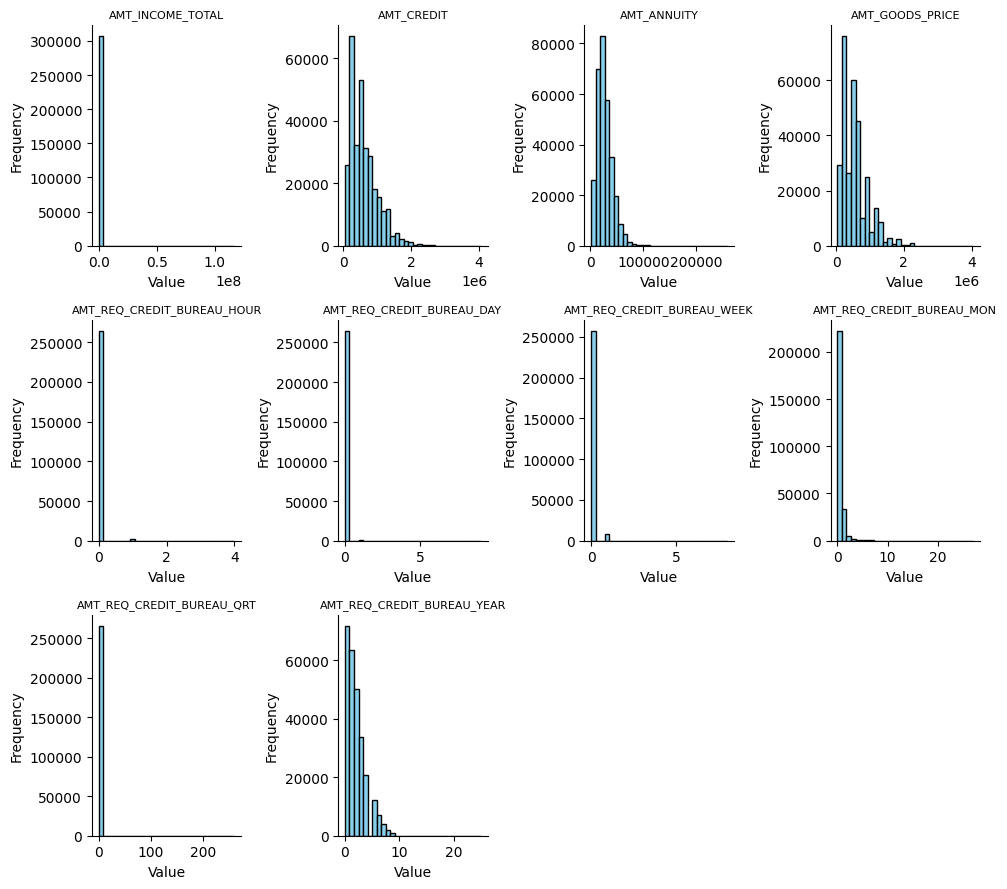

In [20]:
Multi_hist_ploting(app, Amt)

columns that contain nulls and no enough variation , we will drop it , not Valuable

In [21]:
# columns to drop
Amt_to_drop = Amt[4:9] + [Amt[0]]

In [22]:
new_data = app.drop(columns = Amt_to_drop)
#new_test_data = test_data.drop(columns = Amt_to_drop)
new_data.shape

(307511, 69)

Now before handling the missing ,Let's check if we need to drop another columns or Not

Flag Columns

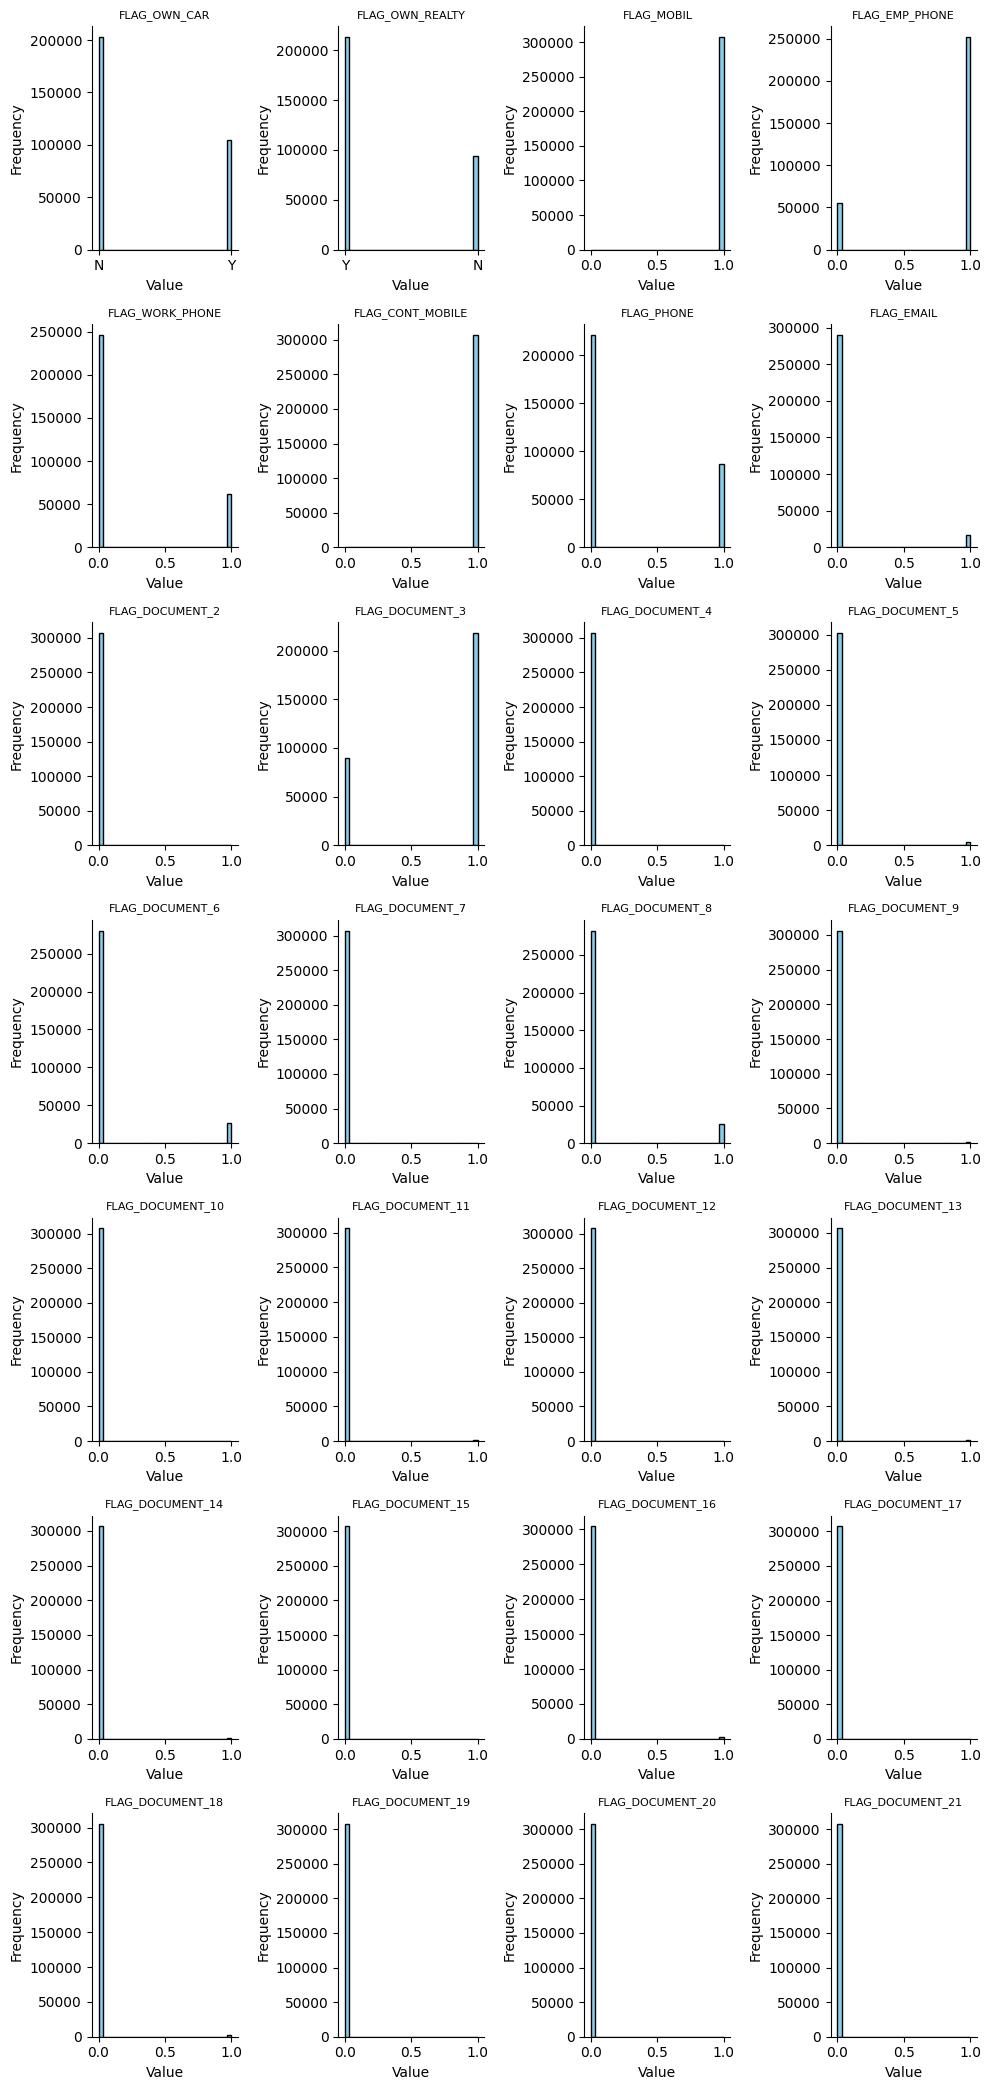

In [23]:
flags = extract_col_starts_with(data = app ,the_string="FLAG_")
Multi_hist_ploting(data = app ,columns =  flags)

In [24]:
flags_to_drop = [flags[2]]+ [flags[5]]+ flags[7:9] + flags[10:]
flags_to_drop

['FLAG_MOBIL',
 'FLAG_CONT_MOBILE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [25]:
app = app.drop(columns = flags_to_drop)
#test_data_after_drp_cols = new_test_data.drop(columns = flags_to_drop)
app.shape

(307511, 53)

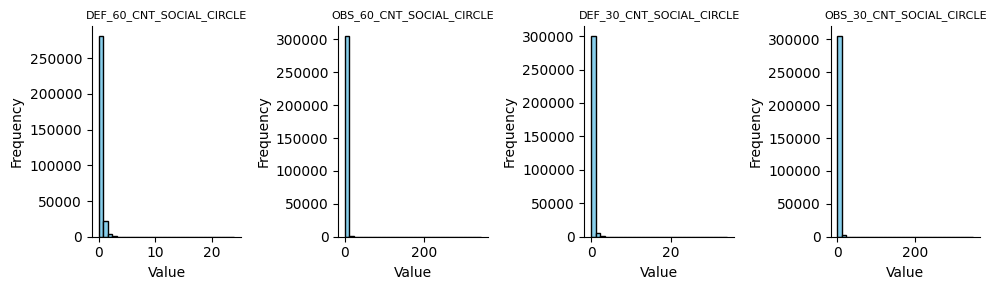

In [26]:
CNT_cols = ['DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
            'DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE']

Multi_hist_ploting(data = app[CNT_cols] ,columns =  CNT_cols)

In [27]:
# drop all ..._CNT_SOCIAL_CIRCLE columns
app.drop(columns=CNT_cols,inplace=True)

- performing data imputation for missing values in the 'occupation_type'
- column of a DataFrame (app) based on certain conditions regarding two other
-  columns: 'name_education_type' and 'amt_income_total'.

In [28]:
## Columns that requires imputation
pd.pivot_table(values = 'AMT_INCOME_TOTAL', index = 'OCCUPATION_TYPE', columns = 'NAME_EDUCATION_TYPE', data = app, aggfunc = 'median')

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
OCCUPATION_TYPE,,,,,
Accountants,209250.0,180000.0,157500.0,186750.0,157500.0
Cleaning staff,202500.0,130500.0,117000.0,112500.0,112500.0
Cooking staff,67500.0,153000.0,135000.0,112500.0,126000.0
Core staff,225000.0,171000.0,153000.0,112500.0,135000.0
Drivers,162000.0,180000.0,180000.0,157500.0,180000.0
HR staff,NaN,180000.0,135000.0,NaN,157500.0
High skill tech staff,157500.0,180000.0,157500.0,139500.0,153000.0
IT staff,NaN,180000.0,180000.0,112500.0,157500.0
Laborers,225000.0,171000.0,157500.0,135000.0,144000.0


In [29]:
def replace_occupation_type(education, income_ranges, replacements):
    for (low, high), replacement in zip(income_ranges, replacements):
        condition = (app['NAME_EDUCATION_TYPE'] == education) & (app['AMT_INCOME_TOTAL'] > low) & (app['AMT_INCOME_TOTAL'] <= high)
        app.loc[condition, 'OCCUPATION_TYPE'] = app.loc[condition, 'OCCUPATION_TYPE'].replace(np.nan, replacement)

# Define income ranges and replacements for each education level
academic_degree_ranges = [(0, 100000), (100000, 150000), (150000, 175000), (175000, 200000), (200000, 225000), (225000, float('inf'))]
academic_degree_replacements = ['Low-skill Laborers', 'Sales staff', 'High skill tech staff', 'Security staff', 'Realty agents', 'Private service staff']

higher_education_ranges = [(0, 150000), (150000, 175000), (175000, 200000), (200000, float('inf'))]
higher_education_replacements = ['Cooking staff', 'Medicine staff', 'HR staff', 'Managers']

incomplete_higher_ranges = [(0, 120000), (120000, 150000), (150000, 175000), (175000, 200000), (200000, float('inf'))]
incomplete_higher_replacements = ['Cleaning staff', 'Secretaries', 'Core staff', 'IT staff', 'Managers']

lower_secondary_ranges = [(0, 120000), (120000, 150000), (150000, 175000), (175000, 200000), (200000, float('inf'))]
lower_secondary_replacements = ['Waiters/barmen staff', 'Sales staff', 'Secretaries', 'Accountants', 'Managers']

secondary_special_ranges = [(0, 120000), (120000, 150000), (150000, 175000), (175000, 200000), (200000, float('inf'))]
secondary_special_replacements = ['Cleaning staff', 'Low-skill Laborers', 'HR staff', 'Realty agents', 'Private service staff']

# Apply the function for each education type
replace_occupation_type('Academic degree', academic_degree_ranges, academic_degree_replacements)
replace_occupation_type('Higher education', higher_education_ranges, higher_education_replacements)
replace_occupation_type('Incomplete higher', incomplete_higher_ranges, incomplete_higher_replacements)
replace_occupation_type('Lower secondary', lower_secondary_ranges, lower_secondary_replacements)
replace_occupation_type('Secondary / secondary special', secondary_special_ranges, secondary_special_replacements)


-  ORGANIZATION_TYPE have too many levels. Performing encoding will lead to sparse data.
-  For ORGANIZATION_TYPE, the following mapping will be done:
-  Business_Finance : Business Entity Type 1, Business Entity Type 2, Business Entity Type 3, Bank, Insurance
-  Civil_Legal_Services : Security, Security Ministries, Police, Military, Emergency, Government, Legal Services
-  Industry_Trade : Industry: type 1 to Industry: type 13. Trade: type 1 to Trade: type 7
-  Travel_Hospitality_Real_Estate : Transport: type 1 to Transport: type 4, Hotel, Housing, Restaurant, Culture, Realtor
-  Communication : Mobile, Postal, Telecom, Advertising
-  Education_Healthcare : School, University, Kindergarten, Medicine
-  Goods_Producing_And_Services : Cleaning, Construction, Agriculture, Electricity, Services
-  Miscellaneous - XNA, Other, Religion

In [30]:

app['Organization_mapped'] = app['ORGANIZATION_TYPE'].apply(map_organization_type)


In [31]:
app.drop(columns='ORGANIZATION_TYPE',inplace=True)

In [32]:
missing_after_remove_cols = missing(app)
missing_after_remove_cols[(missing_after_remove_cols['null_count'] > 1 )].sort_values(by= 'msng_pct', ascending=False)

,col_name,null_count,msng_pct
48,EXT_SOURCE_1,173378,56.381073
47,EXT_SOURCE_3,60965,19.825307
46,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
42,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
41,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
43,AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
44,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
45,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
40,NAME_TYPE_SUITE,1292,0.420148
39,EXT_SOURCE_2,660,0.214626


In [33]:
app.dropna(thresh=41).shape[0] /new_data.shape[0]


0.9994731895769582

In [34]:
app.TARGET.value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

if we remove nulls with thresh = 41 we will lose 16 percent of the data, maybe accepted but the real problem is with class of the target because we need to fix the class imbalance , so if the nulls in the minor class we can't remove it

In [35]:
app['TARGET'].value_counts().values

array([282686,  24825])

In [36]:
classes = app.dropna(thresh=44)
classes['TARGET'].value_counts().values / app['TARGET'].value_counts().values

array([0.86830971, 0.82710977])

we can Drop the missing that Related to Class 0 (Not Default)

In [37]:
app[(app['TARGET']==0)].dropna(thresh=44).shape[0] /app[(app['TARGET']==0)].shape[0]


0.8683097146657422

In [38]:
# Training Data
zero_new_data =app[(app['TARGET']==0)].dropna(thresh=44)
one_new_data = app[(app['TARGET']==1)]
app = pd.concat([zero_new_data, one_new_data], axis = 0).sort_values(by = 'SK_ID_CURR')


app.shape

(270284, 49)

In [39]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 

In [40]:
mis = missing(app)
mis[mis['null_count']>1].sort_values(by='null_count', ascending = False)

,col_name,null_count,msng_pct
48,EXT_SOURCE_1,151079,55.896390
47,EXT_SOURCE_3,23738,8.782614
41,AMT_REQ_CREDIT_BUREAU_WEEK,4292,1.587959
42,AMT_REQ_CREDIT_BUREAU_HOUR,4292,1.587959
44,AMT_REQ_CREDIT_BUREAU_QRT,4292,1.587959
46,AMT_REQ_CREDIT_BUREAU_DAY,4292,1.587959
43,AMT_REQ_CREDIT_BUREAU_MON,4292,1.587959
45,AMT_REQ_CREDIT_BUREAU_YEAR,4292,1.587959
40,NAME_TYPE_SUITE,1196,0.442498
39,EXT_SOURCE_2,539,0.199420


In [41]:
ctr = ['SK_ID_CURR','NAME_TYPE_SUITE',
       'CNT_CHILDREN','DAYS_BIRTH',
       'CNT_FAM_MEMBERS' ,'NAME_EDUCATION_TYPE',
       'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE']

app.drop(columns = ctr, inplace = True)


In [42]:
mis = missing(app)
mis[mis['null_count']>1].sort_values(by='null_count', ascending = False)

,col_name,null_count,msng_pct
40,EXT_SOURCE_1,151079,55.896390
39,EXT_SOURCE_3,23738,8.782614
34,AMT_REQ_CREDIT_BUREAU_YEAR,4292,1.587959
33,AMT_REQ_CREDIT_BUREAU_MON,4292,1.587959
36,AMT_REQ_CREDIT_BUREAU_WEEK,4292,1.587959
35,AMT_REQ_CREDIT_BUREAU_HOUR,4292,1.587959
38,AMT_REQ_CREDIT_BUREAU_QRT,4292,1.587959
37,AMT_REQ_CREDIT_BUREAU_DAY,4292,1.587959
32,EXT_SOURCE_2,539,0.199420
31,AMT_GOODS_PRICE,238,0.088056


In [43]:
cols = mis[mis['null_count']>1].sort_values(by='null_count', ascending = False)['col_name'].values

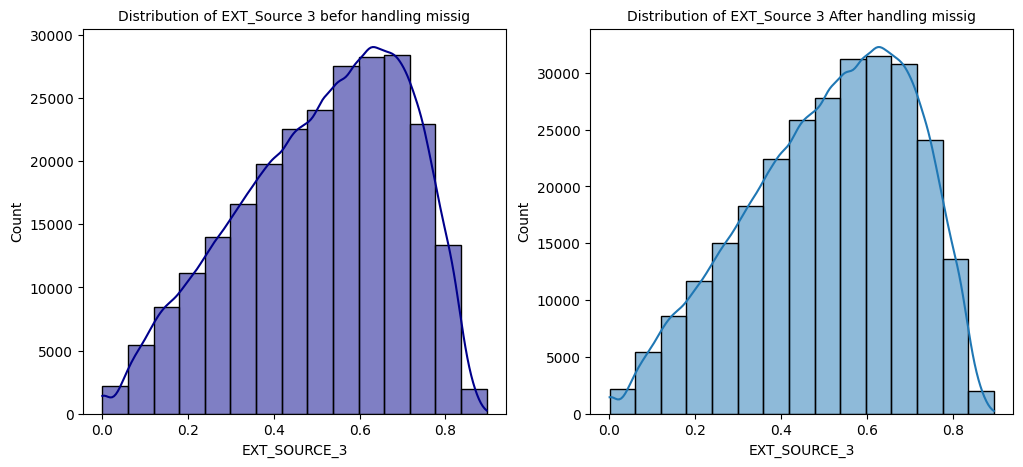

In [44]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Distribution of EXT_Source 3 befor handling missig', fontsize = 10)
sns.histplot(app['EXT_SOURCE_3'], kde=True, bins = 15, color= 'darkblue' )
plt.subplot(122)
plt.title('Distribution of EXT_Source 3 After handling missig', fontsize = 10)
sns.histplot(app['EXT_SOURCE_3'].interpolate(method= 'linear'), bins = 15, kde=True)
plt.show()

No chnage in the distribution of the Variable so interpolate method(predicting the missing using linear model) doesn't change the behavior of the data

In [45]:
app['EXT_SOURCE_3'].interpolate(method= 'linear', inplace = True)

In [46]:
mis = missing(app)
mis[mis['null_count']>1].sort_values(by='null_count', ascending = False)

,col_name,null_count,msng_pct
40,EXT_SOURCE_1,151079,55.896390
34,AMT_REQ_CREDIT_BUREAU_YEAR,4292,1.587959
36,AMT_REQ_CREDIT_BUREAU_WEEK,4292,1.587959
38,AMT_REQ_CREDIT_BUREAU_QRT,4292,1.587959
37,AMT_REQ_CREDIT_BUREAU_MON,4292,1.587959
39,AMT_REQ_CREDIT_BUREAU_DAY,4292,1.587959
35,AMT_REQ_CREDIT_BUREAU_HOUR,4292,1.587959
33,EXT_SOURCE_2,539,0.199420
32,AMT_GOODS_PRICE,238,0.088056
31,AMT_ANNUITY,11,0.004070


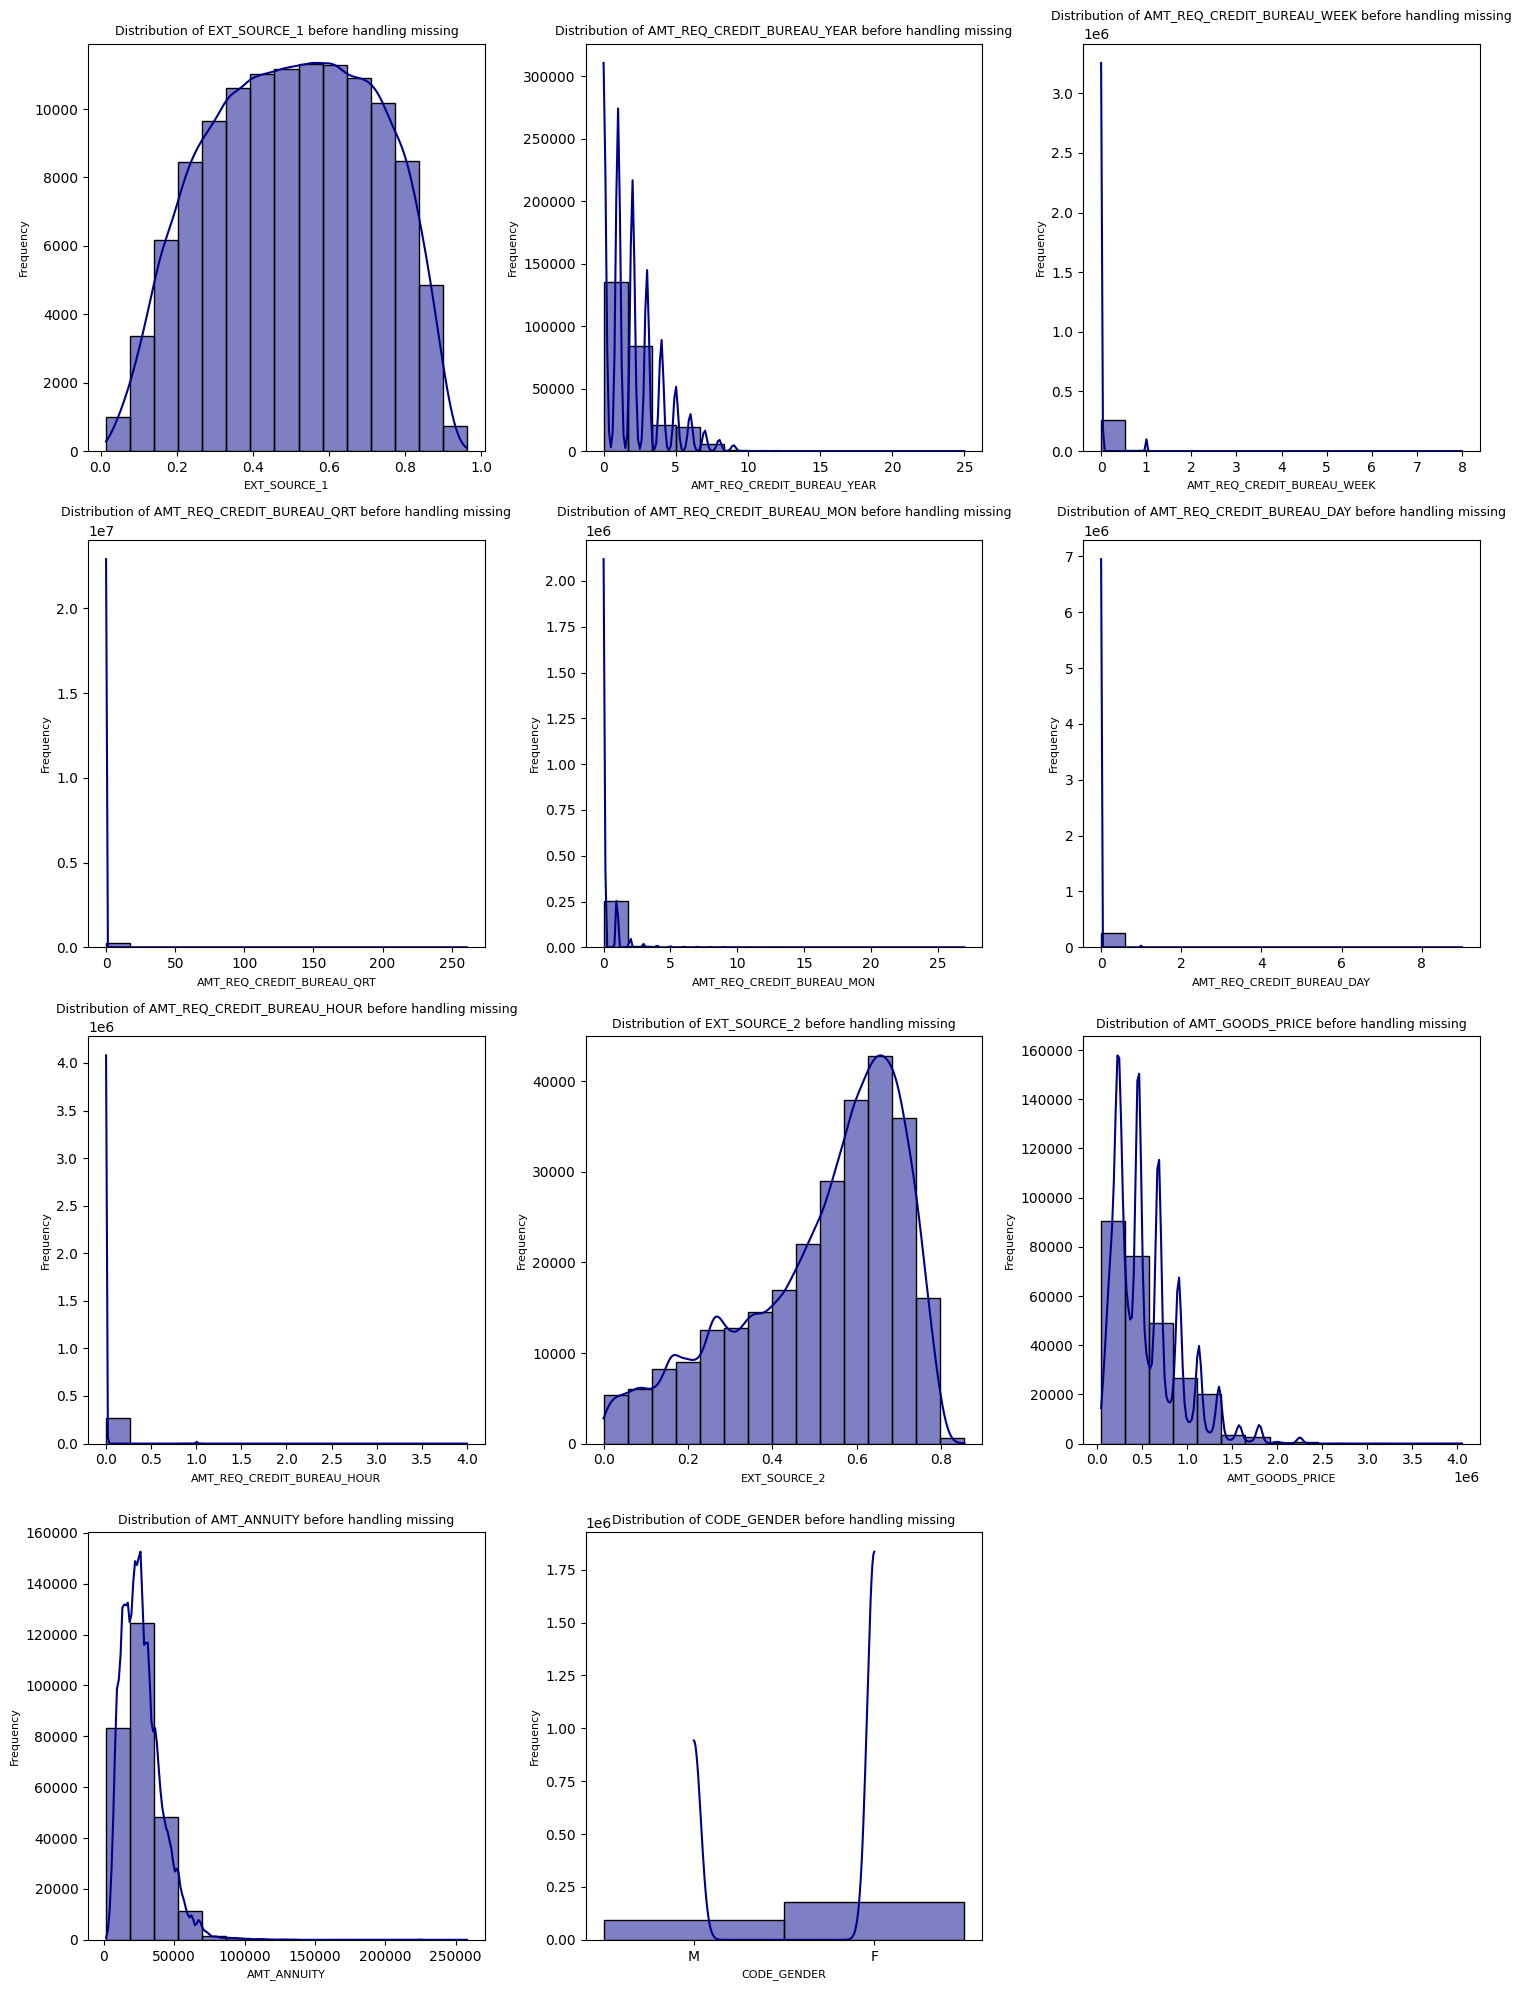

In [47]:
col_names_to_plot = mis[mis['null_count']>1].sort_values(by='null_count', ascending = False)['col_name'].values
# Determine the number of subplots needed
num_plots = len(col_names_to_plot)

# Calculate the number of rows and columns needed for the subplots
cols = 3
rows = math.ceil(num_plots / cols)

# Create a figure with a grid of subplots
plt.figure(figsize=(15, rows * 5))  # Adjust the size of the entire figure based on the number of rows

# Loop through the columns and create a subplot for each
for i, col in enumerate(col_names_to_plot):
    plt.subplot(rows, cols, i + 1)  # Create a grid, filling it row by row
    plt.title(f'Distribution of {col} before handling missing', fontsize=9)
    sns.histplot(app[col], kde=True, bins=15, color='darkblue')
    plt.xlabel(col, fontsize=8)  # X-axis label
    plt.ylabel('Frequency', fontsize=8)  # Y-axis label

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


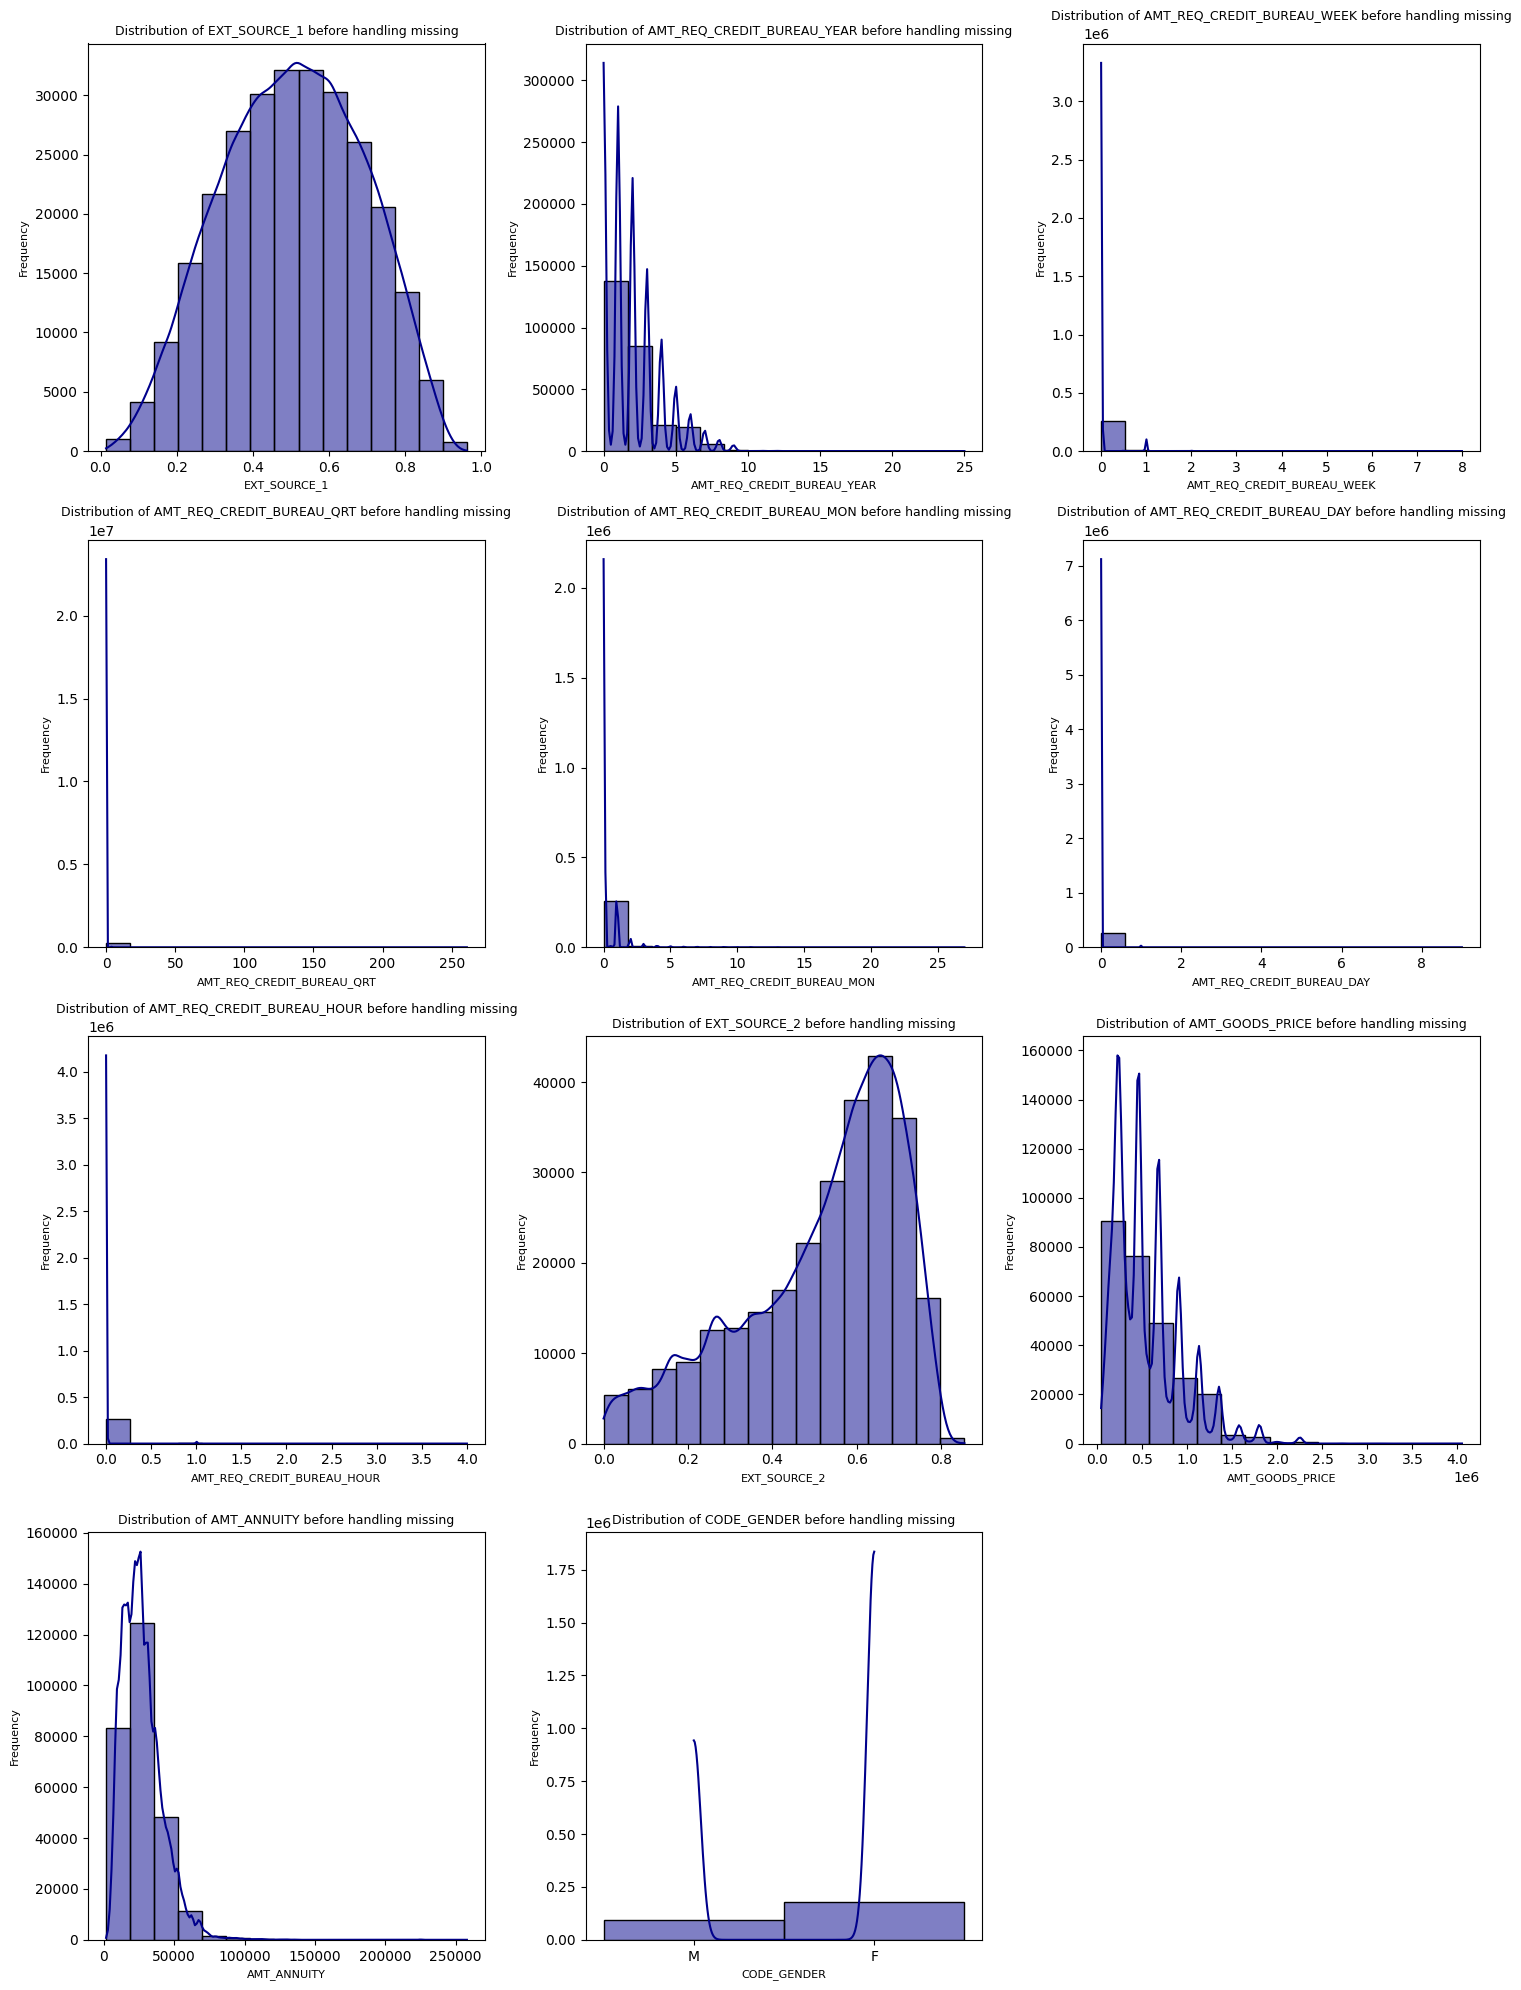

In [48]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the number of subplots needed
num_plots = len(col_names_to_plot)

# Calculate the number of rows and columns needed for the subplots
cols = 3
rows = math.ceil(num_plots / cols)

# Create a figure with a dynamic grid of subplots
plt.figure(figsize=(15, rows * 5))  # Adjust the size of the entire figure

# Loop through the columns and create a subplot for each
for i, col in enumerate(col_names_to_plot):
    plt.subplot(rows, cols, i + 1)  # Create a grid, filling it row by row
    plt.title(f'Distribution of {col} before handling missing', fontsize=9)
    sns.histplot(app[col].interpolate(method='linear'), kde=True, bins=15, color='darkblue')
    plt.xlabel(col, fontsize=8)  # X-axis label
    plt.ylabel('Frequency', fontsize=8)  # Y-axis label

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


# # Create a figure with a 3x3 grid of subplots
# plt.figure(figsize=(15,10))  # Adjust the size of the entire figure

# # Loop through the columns and create a subplot for each
# for i, col in enumerate(col_names_to_plot):
#     plt.subplot(3, 3, i + 1)  # Create a 3x3 grid, filling it row by row
#     plt.title(f'Distribution of {col} before handling missing', fontsize=9)
#     sns.histplot(app[col].interpolate(method = 'linear'), kde=True, bins=15, color='darkblue')
#     plt.xlabel(col, fontsize=8)  # X-axis label
#     plt.ylabel('Frequency', fontsize=8)  # Y-axis label

# # Adjust the layout to prevent overlap
# plt.tight_layout()

# # Show the plot
# plt.show()


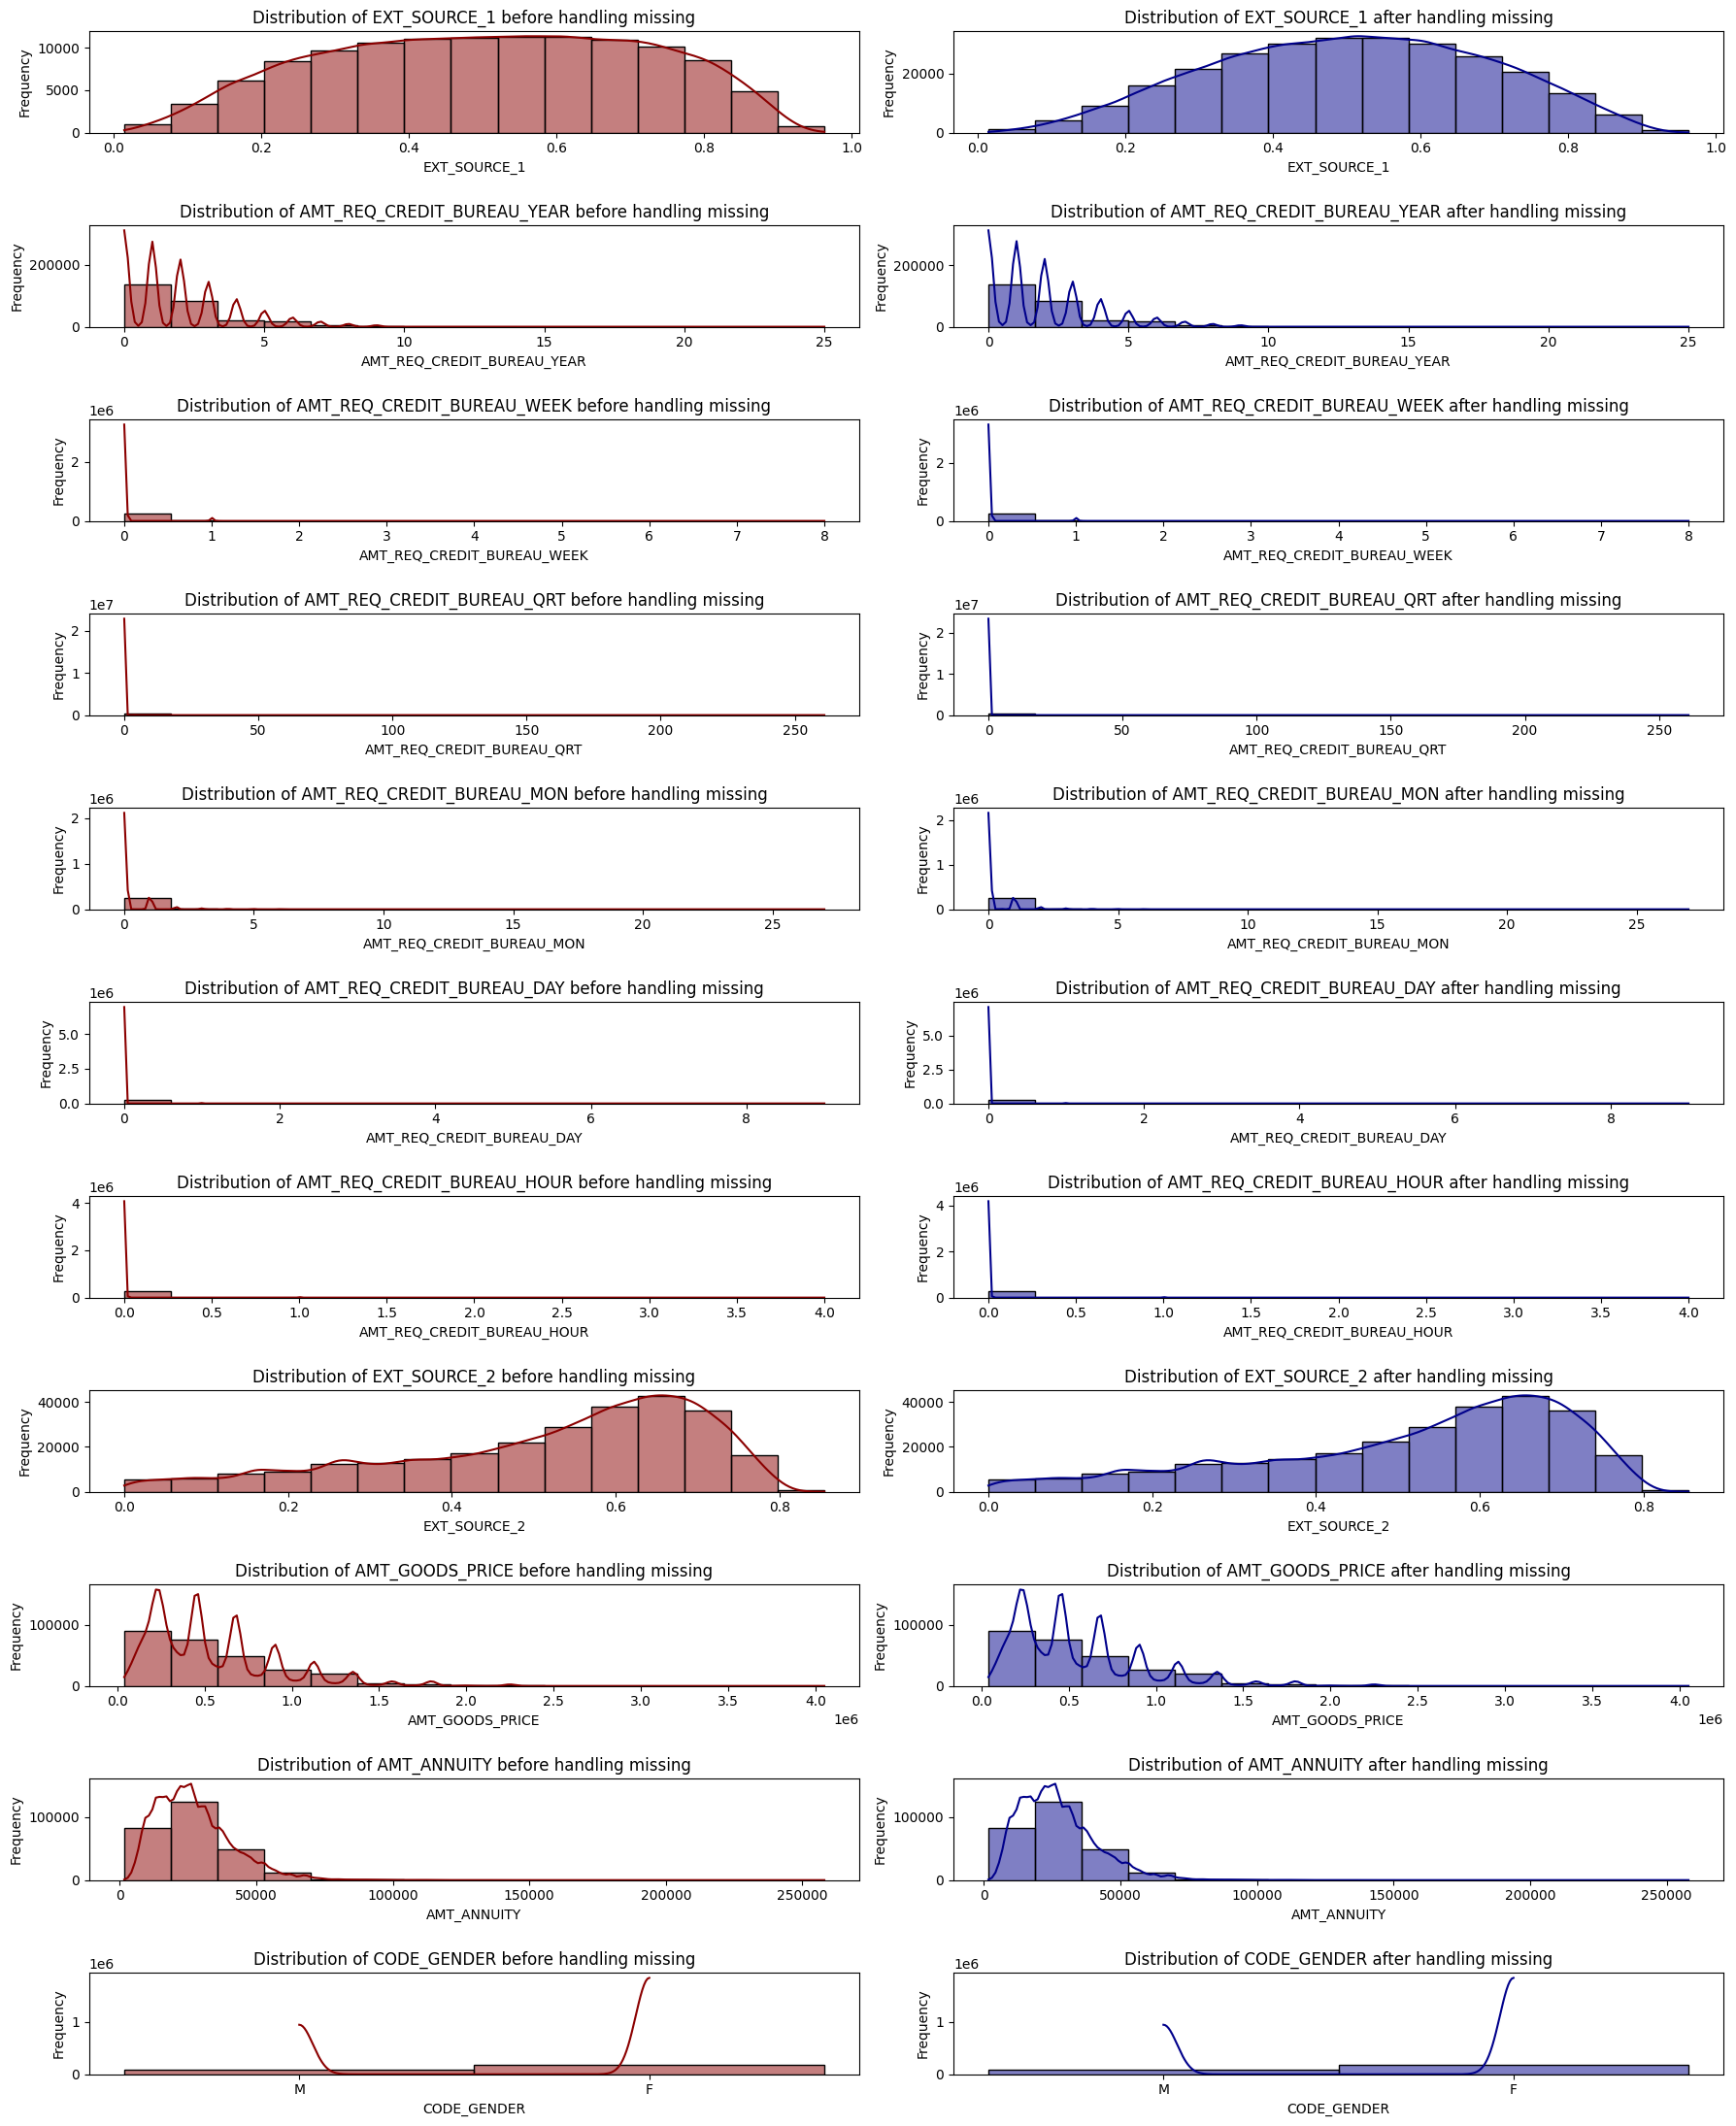

In [49]:
# Calculate the number of rows needed (2 subplots per column: before and after)
n_cols = 3  # Number of columns in the grid
n_rows = len(col_names_to_plot)  # One row per feature, with 2 subplots per row

# Create a figure with subplots
plt.figure(figsize=(18, 2 * n_rows))  # Adjust size as needed

# Loop through the columns and create subplots for before and after handling missing data
for i, col in enumerate(col_names_to_plot):
    # Plot before handling missing values
    plt.subplot(n_rows, 2, 2 * i + 1)
    sns.histplot(app[col], kde=True, bins=15, color='darkred')
    plt.title(f'Distribution of {col} before handling missing', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

    # Plot after handling missing values (interpolated)
    plt.subplot(n_rows, 2, 2 * i + 2)
    sns.histplot(app[col].interpolate(method='linear'), kde=True, bins=15, color='darkblue')
    plt.title(f'Distribution of {col} after handling missing', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [50]:
app.interpolate(mehtod = 'linear', inplace = True)
# full_test_data.interpolate(mehtod = 'linear', inplace = True)
app.isnull().sum().sum()

5

In [51]:
mis = missing(app)
mis[mis['null_count']>1].sort_values(by='null_count', ascending = False)

,col_name,null_count,msng_pct
40,CODE_GENDER,4,0.00148


In [52]:
app.dropna(inplace=True)

##### Handlling the negative and inconsistance data

In [53]:
# Select only the numeric columns
numeric_df = app.select_dtypes(include=[np.number])

# Identify columns with negative values in the numeric DataFrame
negative_columns = numeric_df.columns[(numeric_df < 0).any()]

# Handle negative values by converting them to absolute values in training data
app[negative_columns] = app[negative_columns].abs()


In [54]:
app.isnull().sum().sort_values(ascending=False)

TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
OWN_CAR_AGE                    0
FLAG_WORK_PHONE                0
FLAG_PHONE                     0
OCCUPATION_TYPE                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
EXT_SOURCE_1                   0
EXT_SOURCE

In [55]:
app.shape

(270279, 41)

## EDA

##### Problem Formulation
##### Loan defaulting is a significant concern for financial institutions as it directly impacts profitability and risk management.

##### Identifying potential defaulters before issuing a loan can help mitigate losses and improve decision-making.

##### The goal is to develop a predictive model that can accurately classify loan applicants into defaulters and non-defaulters based on their historical data and financial attributes.



##### Load application_data.csv

In [ ]:
application_df= pd.read_csv('D:/Banque Misr Internship/Loan Datasets/application_data.csv')

### Explore dataset

In [ ]:
application_df.shape

In [ ]:
application_df.head(5)

In [ ]:
result = application_df[application_df['CODE_GENDER'] == 'XNA']
print(result)

##### Derive some statistical data about the dataset

In [ ]:
application_df.describe()

##### Check if dataset has nulls

In [ ]:
null_counts = application_df.isna().sum()

##### Check number of nulls

In [ ]:
null_counts_df = null_counts.reset_index()
null_counts_df.columns = ['Feature', 'Number of Nulls']

plt.figure(figsize=(20, 10))  
sns.barplot(x='Feature', y='Number of Nulls', data=null_counts_df, color='darkred')
plt.title('Number of Nulls in Each Feature')
plt.xlabel('Features')
plt.ylabel('Number of Nulls')
plt.xticks(rotation=90, fontsize=8)  # Rotate x labels and adjust font size
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()

##### Calculate the precentage of those nulls

In [ ]:
application_null_percentage = application_df.isnull().sum() / len(application_df) * 100

high_null_features = application_null_percentage[application_null_percentage > 40].index.tolist()
print("Features with more than 40% null values:")
print(high_null_features)
print(len(high_null_features))

##### As we can see there are alot of features with null values, lets plot to better see the results!

In [ ]:
null_applicationDF = pd.DataFrame(application_null_percentage).reset_index()
null_applicationDF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_applicationDF,color='blue')
plt.xticks(rotation =90,fontsize =7) #make x axis vertical
ax.axhline(40, ls='--',color='red') # plot line that represents 40%
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

##### We establish a baseline of 40% to see which features have a higher % of nulls than that baseline, the alot of features are near the 60-70% mark meaning they will likely be dropped

##### Create an array to hold the features that will be dropped

In [ ]:
dropped_features= []

##### Now let use check to see if the data is imbalanced

In [ ]:
target_counts = application_df['TARGET'].value_counts()
print(target_counts)

In [ ]:
data = {
    'Target': [0,1],
    'Count': [282686, 24825]
}
df = pd.DataFrame(data)
sns.barplot(x='Target', y='Count', data=df, color='#3498db')
plt.title('Target Count')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

##### As we can see the data is highly imbalanced so we will re-sample later
##### Let's see how many of those who own a car repay the loan

In [ ]:
# Your existing code to filter and calculate the data
car_owners = application_df[application_df['FLAG_OWN_CAR'] == 'Y']
non_car_owners = application_df[application_df['FLAG_OWN_CAR'] == 'N']

# Calculate the number of loan repayers and defaulters among car owners
car_owners_repay = car_owners[car_owners['TARGET'] == 0].shape[0]
car_owners_default = car_owners[car_owners['TARGET'] == 1].shape[0]

# Calculate the number of loan repayers and defaulters among non-car owners
non_car_owners_repay = non_car_owners[non_car_owners['TARGET'] == 0].shape[0]
non_car_owners_default = non_car_owners[non_car_owners['TARGET'] == 1].shape[0]

# Prepare data for pie charts
labels = ['Repayers', 'Defaulters']
car_owners_sizes = [car_owners_repay, car_owners_default]
non_car_owners_sizes = [non_car_owners_repay, non_car_owners_default]

# Plotting the pie chart for car owners
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.pie(car_owners_sizes, labels=labels, autopct='%1.1f%%', colors=['#3498db', '#e74c3c'])  # Dark blue for repayers, red for defaulters
plt.title('Loan Repayment Status of Car Owners')

# Plotting the pie chart for non-car owners
plt.subplot(1, 2, 2)
plt.pie(non_car_owners_sizes, labels=labels, autopct='%1.1f%%', colors=['#3498db', '#e74c3c'])  # Dark blue for repayers, red for defaulters
plt.title('Loan Repayment Status of Non-Car Owners')

plt.tight_layout()
plt.show()

##### let's see male vs female

In [ ]:
total_males = application_df[application_df['CODE_GENDER'] == 'M'].shape[0]
total_females = application_df[application_df['CODE_GENDER'] == 'F'].shape[0]

# Calculate the number of male and female applicants who repaid their loans
males_repay = application_df[(application_df['CODE_GENDER'] == 'M') & (application_df['TARGET'] == 0)].shape[0]
females_repay = application_df[(application_df['CODE_GENDER'] == 'F') & (application_df['TARGET'] == 0)].shape[0]

# Calculate the percentage of males and females who repaid their loans
male_repay_percentage = (males_repay / total_males) * 100
female_repay_percentage = (females_repay / total_females) * 100

# Prepare data for pie chart
labels = ['Males', 'Females']
sizes = [male_repay_percentage, female_repay_percentage]

# Plotting the pie chart with Seaborn style
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#3498db', '#e74c3c'])  # Darker blue and red shades for better contrast
plt.title('Repayment Rate: Males vs. Females')
plt.show()

##### Lets see a scatter plot for credit amount

In [ ]:
# Box plot of credit amount vs target
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=application_df, palette=['#3498db', '#e74c3c'])
plt.title('Credit Amount vs Loan Repayment Status')
plt.xlabel('Loan Repayment Status')
plt.ylabel('Credit Amount')
plt.xticks([0, 1], ['Repaid', 'Defaulted'])
plt.show()

##### Let's now check for the importance of features, we will be using a heatmap to analyze their correlation with the Target

In [ ]:
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','TARGET']
Contact_corr = application_df[contact_col].corr()

plt.figure(figsize=(12,7))
sns.heatmap(Contact_corr,cmap='coolwarm',linewidths=.5,annot=True)
contact_col.remove('TARGET')

##### We can see that all the features included here are not relevant w.r.t Target so we will drop them

In [ ]:
application_df.drop(labels=contact_col,axis=1)

##### Add the irrelevant features to the features that have high % nulls to the array we created

In [ ]:
dropped_features = high_null_features + contact_col
print(dropped_features)
print(len(dropped_features))

##### We have 59 features to be dropped so far

##### Let's now analyze EXT_SOURCE as we cant decide on their importance, we will use another heatmap

In [ ]:
ext_source_col = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3', 'TARGET']
ext_corr = application_df[ext_source_col].corr()
fig = plt.figure(figsize=(7,7))
ax = sns.heatmap(ext_corr,
            xticklabels=ext_corr.columns,
            yticklabels=ext_corr.columns,
            annot = True,
            cmap ="coolwarm",
            linewidth=0.5)

##### As we can see there is some negative correlation with the Target so we wll leave them for now
##### Next, I've noticed that there are 19 features related to FLAG_DCOUMENT and most of them are filled with 0s so let's further validate this using barcharts

In [ ]:
# Checking the relevance of Flag_Document and whether it has any relation with loan repayment status
col_Doc = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
# Ensuring we are working with a copy to avoid SettingWithCopyWarning
df_flag = application_df.loc[:, col_Doc + ["TARGET"]].copy()

# Replace the values in the 'TARGET' column
df_flag["TARGET"] = df_flag["TARGET"].replace({1: "Defaulter", 0: "Repayer"})

fig = plt.figure(figsize=(21, 24))
length = len(col_Doc)

# Iterate over the FLAG_DOCUMENT columns and plot countplot for each
for i, j in itertools.zip_longest(col_Doc, range(length)):
    plt.subplot(5, 4, j + 1)
    sns.countplot(x=df_flag[i], hue=df_flag["TARGET"], palette=["r", "g"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

plt.tight_layout()
plt.show()

##### As we can see above the FLAG_DOCUMENT has 0s across the board so we will drop all the features apart from FLAG_DOCUMENT_3 as it has values submitted



In [ ]:
col_Doc.remove('FLAG_DOCUMENT_3')
dropped_features = dropped_features+ col_Doc
print(dropped_features)
print(len(dropped_features))

##### We have 78 features to be dropped so far

##### Drop more features that seem of no importance by looking through ther description.

##### We have a total of 92 features to be dropped leaving us with 30 features, let's now dropped them and save them to a new file

In [ ]:
dropped_features = dropped_features + ['DAYS_REGISTRATION', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY', 'NAME_CONTRACT_TYPE', 'AMT_REQ_CREDIT_BUREAU_DAY' ,'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT' ]
print(len(dropped_features))
reduced_df = application_df.drop(labels=dropped_features, axis=1)

In [ ]:
 reduced_df

##### Save the new dataframe as a csv file

In [ ]:
filepath = Path('D:/Banque Misr Internship/Loan Datasets/sampled_data_1.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
reduced_df.to_csv(filepath)

## Modelling

### Preprocessing for Modelling

one hot encoding for categorical features

In [56]:
data_for_modelling = pd.get_dummies(app)
data_for_modelling.shape

(270279, 93)

In [57]:
# split the data to X features and target vector y
X = data_for_modelling.drop(columns=['TARGET'])
y = data_for_modelling['TARGET']

In [58]:
# spliting the data to train and test data
X_train, X_test , y_train, y_test = train_test_split(X, y,
                                                     test_size=0.3,
                                                      random_state=42,
                                                       stratify=y)


1 - Logistic Regression
- Logistic regression is a commonly used algorithm for binary classification tasks, and is suitable for predicting whether a loan applicant is likely to default or not.
- Reason to choose: relatively simple and interpretable algorithm.

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     73636
           1       0.00      0.00      0.00      7448

    accuracy                           0.91     81084
   macro avg       0.45      0.50      0.48     81084
weighted avg       0.82      0.91      0.86     81084



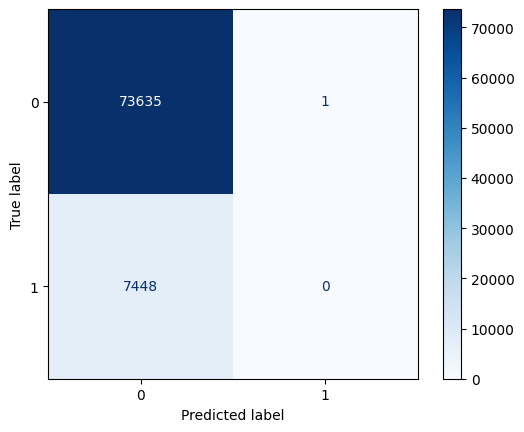

In [59]:
# Initialize a logistic regression model
log_reg = LogisticRegression()
9o
log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)
plt.show()

The model can't classify class 1(Defualters) that we acuatlly target it, so let's check the class distribution

In [60]:
y.value_counts()

TARGET
0    245454
1     24825
Name: count, dtype: int64

okey, we have the problem of imbalanced data
- we will handle it using SMOTE OverSampling

In [61]:
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X, y)



In [62]:
# spliting the data to train and test data
X_train, X_test , y_train, y_test = train_test_split(X_resampled,
                                                      y_resampled,
                                                     test_size=0.3,
                                                       random_state=42,
                                                       stratify=y_resampled)

##### Model After Handling the imbalanced data

              precision    recall  f1-score   support

           0       0.57      0.65      0.61     73637
           1       0.59      0.51      0.55     73636

    accuracy                           0.58    147273
   macro avg       0.58      0.58      0.58    147273
weighted avg       0.58      0.58      0.58    147273



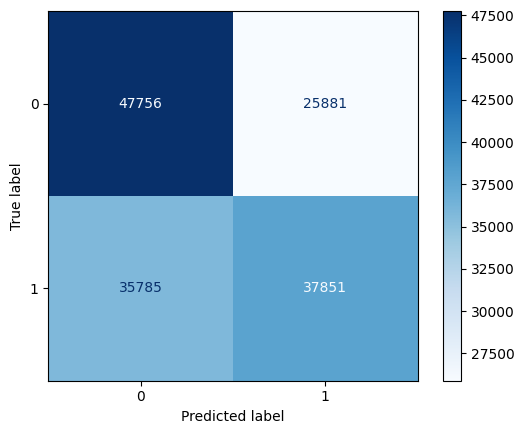

In [63]:
# Initialize a logistic regression model
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)
plt.show()

the model can classify the to class but with very low accuarcy, precision and Recall , we need to make the recall of class 1 high, (model can predict the defualters with better way), so we can try models more complex

##### RandomForest

Accuracy: 0.9503574993379642
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     73637
           1       1.00      0.90      0.95     73636

    accuracy                           0.95    147273
   macro avg       0.95      0.95      0.95    147273
weighted avg       0.95      0.95      0.95    147273



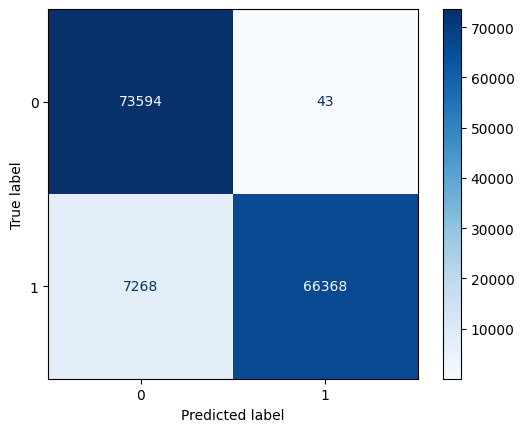

In [64]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

# Check model performance
print(f'Accuracy: {rfc.score(X_test, y_test)}')
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))
cm = confusion_matrix(y_test, y_pred_rfc)
ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)
plt.show()

The Model Scores high recall - 90% for class 1 which is so good

##### XGBoost with low model complexity

In [65]:
xgb_model = XGBClassifier(subsample = 0.6,
                           reg_lambda = 0.01,
                           reg_alpha = 0.01,
                           n_estimators = 300,
                           max_depth =  7,
                           learning_rate = 0.2,
                           gamma = 0 ,
                           colsample_bytree = 0.6,
                           eval_metric='logloss',
                           use_label_encoder=False)
xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     73637
           1       0.99      0.91      0.95     73636

    accuracy                           0.95    147273
   macro avg       0.96      0.95      0.95    147273
weighted avg       0.96      0.95      0.95    147273



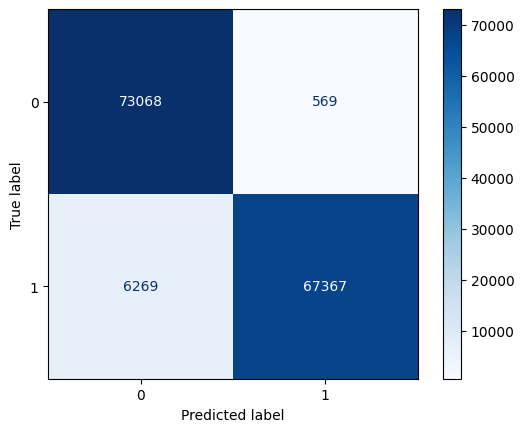

In [66]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)
plt.show()

##### XGBoost with high model complexity

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     73637
           1       0.99      0.92      0.95     73636

    accuracy                           0.95    147273
   macro avg       0.95      0.95      0.95    147273
weighted avg       0.95      0.95      0.95    147273



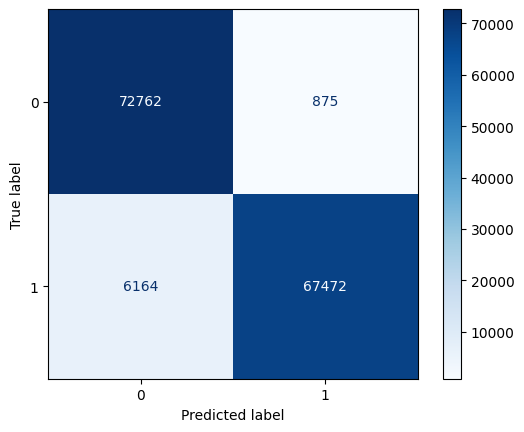

In [67]:
xgb_model = XGBClassifier(subsample = 0.6, reg_lambda = 0.01,
                          reg_alpha = 0.01, n_estimators = 800,
                          max_depth =  8, learning_rate = 0.2, gamma = 0 ,
                          colsample_bytree = 0.6, eval_metric='logloss',
                          use_label_encoder=False)

xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)
plt.show()

### Deep Learning

In [68]:
# Define the model
model = Sequential([
    Input(shape=(92,)),  # Input layer, shape matches the number of features
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # First hidden layer
    BatchNormalization(),  # Batch normalization for stability
    Dropout(0.3),  # Dropout for regularization

    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # Second hidden layer
    BatchNormalization(),  # Batch normalization for stability
    Dropout(0.3),  # Dropout for regularization

    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # Third hidden layer
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # Third hidden layer
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # fourth hidden layer
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy','recall']
)

# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          11,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,609 (174.25 KB)

 Trainable params: 43,777 (171.00 KB)

 Non-trainable params: 832 (3.25 KB)

In [69]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(X_train,
          y_train,
          epochs=200,
          batch_size=64,
          validation_split=0.2,
          callbacks=[early_stopping],
          verbose=1)

Epoch 1/200
4296/4296 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.5532 - loss: 1.5248 - recall: 0.5996 - val_accuracy: 0.5587 - val_loss: 0.6977 - val_recall: 0.7698
Epoch 2/200
4296/4296 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5663 - loss: 0.6952 - recall: 0.5936 - val_accuracy: 0.5330 - val_loss: 0.6996 - val_recall: 0.3671
Epoch 3/200
4296/4296 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5659 - loss: 0.6936 - recall: 0.6221 - val_accuracy: 0.5347 - val_loss: 0.7073 - val_recall: 0.1967
Epoch 4/200
4296/4296 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5700 - loss: 0.6909 - recall: 0.6029 - val_accuracy: 0.5678 - val_loss: 0.6884 - val_recall: 0.4714
Epoch 5/200
4296/4296 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5692 - loss: 0.6896 - recall: 0.5954 - val_accuracy: 0.5744 - val_loss: 0.6890 - val_recall: 0.4992
Epoch 6/200
4296/4296 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5696 - loss: 0.6884 - recall: 0.6062 - val_accuracy: 0.5619 - val_loss: 0.6893 -

In [70]:
evaluation_output = model.evaluate(X_test, y_test, verbose=1)
print(evaluation_output)

4603/4603 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.5820 - loss: 0.6830 - recall: 0.6444
[0.682847261428833, 0.5809211730957031, 0.6439377665519714]


4603/4603 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
              precision    recall  f1-score   support

           0       0.59      0.52      0.55     73637
           1       0.57      0.64      0.61     73636

    accuracy                           0.58    147273
   macro avg       0.58      0.58      0.58    147273
weighted avg       0.58      0.58      0.58    147273

Confusion Matrix:
[[38137 35500]
 [26219 47417]]
AUC-ROC: 0.6105090564160756


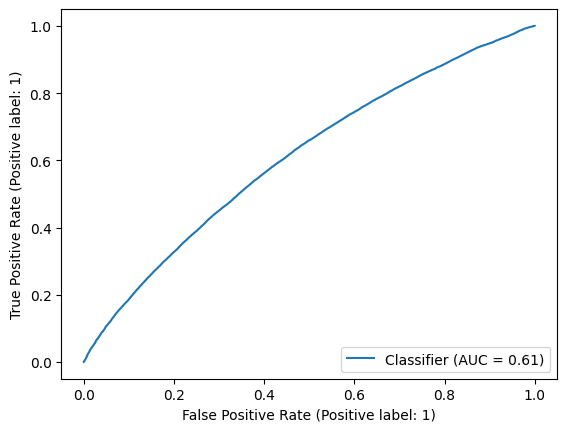

In [71]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Classification report
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print(f"Confusion Matrix:\n{conf_matrix}")

# AUC-ROC curve
roc_auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {roc_auc}")

RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()


#### Model 2

In [72]:
# Define the model
model2 = Sequential([

    Input(shape=(92,)),  # Input layer, shape matches the number of features

    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),  # First hidden layer
    BatchNormalization(),  # Batch normalization for stability

    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),  # Third hidden layer
    BatchNormalization(),  # Batch normalization for stability
    Dropout(0.3),  # Dropout for regularization

    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # fourth hidden layer
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # fifth hidden layer
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # sixth hidden layer
    BatchNormalization(),

    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),  # 7 hidden layer
    BatchNormalization(),

    Dense(8, activation='relu', kernel_regularizer=l2(0.01)),  # 8 hidden layer
    BatchNormalization(),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy','recall']
)

# Summary
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 512)                 │          47,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              

 Total params: 226,913 (886.38 KB)

 Trainable params: 224,881 (878.44 KB)

 Non-trainable params: 2,032 (7.94 KB)

In [73]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model2.fit(X_train,
          y_train,
          epochs=50,
          batch_size=64,
          validation_split=0.2,
          callbacks=[early_stopping],
          verbose=1)

Epoch 1/50
4296/4296 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.5550 - loss: 1.9646 - recall: 0.5729 - val_accuracy: 0.5012 - val_loss: 0.7283 - val_recall: 0.0107
Epoch 2/50
4296/4296 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.5650 - loss: 0.7091 - recall: 0.6087 - val_accuracy: 0.5484 - val_loss: 0.7220 - val_recall: 0.7703
Epoch 3/50
4296/4296 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.5734 - loss: 0.7026 - recall: 0.5826 - val_accuracy: 0.5477 - val_loss: 0.7033 - val_recall: 0.1998
Epoch 4/50
4296/4296 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.5714 - loss: 0.7010 - recall: 0.5591 - val_accuracy: 0.5702 - val_loss: 0.6928 - val_recall: 0.7791
Epoch 5/50
4296/4296 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.5771 - loss: 0.6922 - recall: 0.6001 - val_accuracy: 0.5774 - val_loss: 0.6903 - val_recall: 0.5064
Epoch 6/50
4296/4296 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.5800 - loss: 0.6880 - recall: 0.5726 - val_accuracy: 0.5850 - val_loss: 0.6835 - val_r

In [74]:
# Define the model
model3 = Sequential([

    Input(shape=(92,)),  # Input layer, shape matches the number of features

    Dense(1024, activation='relu', kernel_regularizer=l2(0.01)),  # First hidden layer
    BatchNormalization(),  # Batch normalization for stability

    Dense(1024, activation='relu', kernel_regularizer=l2(0.01)),  # First hidden layer
    BatchNormalization(),  # Batch normalization for stability

    Dense(864, activation='relu', kernel_regularizer=l2(0.01)),  # First hidden layer
    BatchNormalization(),  # Batch normalization for stability

    Dense(654, activation='relu', kernel_regularizer=l2(0.01)),  # Third hidden layer
    BatchNormalization(),  # Batch normalization for stability
    Dropout(0.3),  # Dropout for regularization

    Dense(435, activation='relu', kernel_regularizer=l2(0.01)),  # fourth hidden layer
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),  # fifth hidden layer
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # sixth hidden layer
    BatchNormalization(),

    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # 7 hidden layer
    BatchNormalization(),

    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # 8 hidden layer
    BatchNormalization(),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model3.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy','recall']
)

# Summary
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 1024)                │          95,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 864)                 │         885,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 864)                 │           3,456 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 654)                 │         565,710 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 654)                 │           2,616 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 654)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 435)                 │         284,925 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 435)                 │           1,740 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 435)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 256)                 │         111,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           8,2

 Total params: 3,053,872 (11.65 MB)

 Trainable params: 3,044,910 (11.62 MB)

 Non-trainable params: 8,962 (35.01 KB)

In [ ]:
model3.fit(X_train,
          y_train,
          epochs=50,
          batch_size=32,
          validation_split=0.2,
          verbose=1)

Epoch 1/50
8591/8591 ━━━━━━━━━━━━━━━━━━━━ 56s 5ms/step - accuracy: 0.5311 - loss: 4.2087 - recall: 0.5884 - val_accuracy: 0.5313 - val_loss: 0.8026 - val_recall: 0.8744
Epoch 2/50
8591/8591 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.5251 - loss: 0.8467 - recall: 0.6469 - val_accuracy: 0.4605 - val_loss: 0.8222 - val_recall: 0.3272
Epoch 3/50
8591/8591 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.5340 - loss: 0.7788 - recall: 0.6618 - val_accuracy: 0.5079 - val_loss: 0.7424 - val_recall: 0.9827
Epoch 4/50
8591/8591 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.5381 - loss: 0.7477 - recall: 0.6561 - val_accuracy: 0.5375 - val_loss: 0.7408 - val_recall: 0.8093
Epoch 5/50
8591/8591 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.5405 - loss: 0.7381 - recall: 0.6829 - val_accuracy: 0.5534 - val_loss: 0.7556 - val_recall: 0.8075
Epoch 6/50
8591/8591 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.5477 - loss: 0.7250 - recall: 0.6464 - val_accuracy: 0.5196 - val_loss: 0.7316 - val_r